# Question 1

In [1]:
import numpy as np

In [2]:
def dfdx(f,x):
    eps = 10**(-5)
    y = f(x)
    n = len(x)
    m = len(y)
    dfdx = np.zeros((m,n))
    for k in range(n):
        dx = np.zeros(n)
        dx[k] = eps
        fp = f(x + dx)
        fm = f(x - dx)
        dfdx[:,k] = (fp - fm)/(2*eps)
    return dfdx

In [3]:
def f(x):
    y = np.array([np.sqrt(x[0]*x[1]),x[1]**2+x[0]*np.exp(x[1])])
    return y

In [4]:
x = np.array([1,1])

In [5]:
dydx = dfdx(f,x)
print(dydx)

[[0.5        0.5       ]
 [2.71828183 4.71828183]]


# Question 2

In [6]:
def fsmax(x):
    k = x.max()
    e = np.exp(x-k)
    p = e/e.sum()
    return p

In [7]:
def dydfsmax(x):
    k = x.max()
    e = np.exp(x-k)
    p = e/e.sum()
    return np.outer(p,p)-np.diag(p)

In [8]:
x = np.random.rand(5)

In [9]:
dydx = dfdx(fsmax,x)
dydx

array([[ 0.16621656, -0.04355669, -0.03637662, -0.03610804, -0.05017522],
       [-0.04355669,  0.16407752, -0.03574225, -0.03547835, -0.04930022],
       [-0.03637662, -0.03574225,  0.14292218, -0.02962995, -0.04117336],
       [-0.03610804, -0.03547835, -0.02962995,  0.1420857 , -0.04086936],
       [-0.05017522, -0.04930022, -0.04117336, -0.04086936,  0.18151816]])

In [10]:
dydx2 = dydfsmax(x)
dydx2

array([[-0.16621656,  0.04355669,  0.03637662,  0.03610804,  0.05017522],
       [ 0.04355669, -0.16407752,  0.03574225,  0.03547835,  0.04930022],
       [ 0.03637662,  0.03574225, -0.14292218,  0.02962995,  0.04117336],
       [ 0.03610804,  0.03547835,  0.02962995, -0.1420857 ,  0.04086936],
       [ 0.05017522,  0.04930022,  0.04117336,  0.04086936, -0.18151816]])

# Question 3

In [11]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
df = pd.read_csv("Boston_home_prices.csv")
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [13]:
features = df.drop('medv',axis=1)
target = df['medv']

In [14]:
mu = features.mean()
sd = features.std()
features_s = (features - mu)/sd
features_s.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.326673e-17,3.466704e-16,-3.016965e-15,3.999875e-16,3.507405e-15,-1.249418e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


In [15]:
X = features_s.values
y = target.values
X.shape

(506, 13)

In [16]:
model = Sequential()
model.add(Dense(1,input_shape=(13,)))

model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(X,y,epochs=5000,verbose=0)

mse = hist.history['loss'][-1]
rmse = np.sqrt(mse)
print('RMSE = ' ,rmse, ' baseline RMSE = ',y.std())

RMSE =  4.680019641624429  baseline RMSE =  9.188011545278203


# Question 4

In [17]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
notMNIST = np.load('MNIST_train_100.npz')

images = notMNIST['train_images']
labels = notMNIST['train_labels']

In [19]:
images.shape

(100, 28, 28)

In [20]:
X = images.reshape(100,28*28)
X.shape

(100, 784)

In [21]:
Y = pd.get_dummies(labels).values
Y.shape

(100, 2)

In [22]:
pd.Series(labels).value_counts()

9    58
4    42
dtype: int64

In [23]:
baseline = 58/100

In [24]:
model = Sequential()
model.add(Dense(2,input_shape=(28*28,),kernel_regularizer=regularizers.l2(1)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist = model.fit(X,Y,epochs=100,verbose=1,validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 1s 8ms/step - loss: 4.6009 - acc: 0.4625 - val_loss: 4.3522 - val_acc: 0.3500
Epoch 2/100
80/80 [==============================] - 0s 162us/step - loss: 4.2119 - acc: 0.5500 - val_loss: 4.0153 - val_acc: 0.4000
Epoch 3/100
80/80 [==============================] - 0s 236us/step - loss: 3.8477 - acc: 0.5750 - val_loss: 3.7036 - val_acc: 0.4500
Epoch 4/100
80/80 [==============================] - 0s 187us/step - loss: 3.5177 - acc: 0.5750 - val_loss: 3.4177 - val_acc: 0.5000
Epoch 5/100
80/80 [==============================] - 0s 199us/step - loss: 3.2095 - acc: 0.5750 - val_loss: 3.1427 - val_acc: 0.5000
Epoch 6/100
80/80 [==============================] - 0s 174us/step - loss: 2.9302 - acc: 0.6375 - val_loss: 2.8829 - val_acc: 0.5000
Epoch 7/100
80/80 [==============================] - 0s 185us/step - loss: 2.6714 - acc: 0.6500 - val_loss: 2.6399 - val_acc: 0.4500
Epoch 8/100
80/80 [========

Epoch 62/100
80/80 [==============================] - 0s 187us/step - loss: 0.5365 - acc: 0.9125 - val_loss: 0.7075 - val_acc: 0.7500
Epoch 63/100
80/80 [==============================] - 0s 174us/step - loss: 0.5362 - acc: 0.9125 - val_loss: 0.7063 - val_acc: 0.7500
Epoch 64/100
80/80 [==============================] - 0s 187us/step - loss: 0.5360 - acc: 0.9125 - val_loss: 0.7047 - val_acc: 0.7500
Epoch 65/100
80/80 [==============================] - 0s 164us/step - loss: 0.5367 - acc: 0.9250 - val_loss: 0.7015 - val_acc: 0.7500
Epoch 66/100
80/80 [==============================] - 0s 162us/step - loss: 0.5364 - acc: 0.9250 - val_loss: 0.7026 - val_acc: 0.7500
Epoch 67/100
80/80 [==============================] - 0s 137us/step - loss: 0.5359 - acc: 0.9250 - val_loss: 0.7016 - val_acc: 0.7500
Epoch 68/100
80/80 [==============================] - 0s 212us/step - loss: 0.5358 - acc: 0.9250 - val_loss: 0.7012 - val_acc: 0.7500
Epoch 69/100
80/80 [==============================] - 0s 174us

In [25]:
accuracy = pd.DataFrame()
accuracy['epoch'] = hist.epoch
accuracy['epoch'] = accuracy['epoch']+1
accuracy['training'] = hist.history['acc']
accuracy['testing'] = hist.history['val_acc']
accuracy['baseline'] = baseline
accuracy.head()

,epoch,training,testing,baseline
0,1,0.4625,0.35,0.58
1,2,0.5500,0.40,0.58
2,3,0.5750,0.45,0.58
3,4,0.5750,0.50,0.58
4,5,0.5750,0.50,0.58


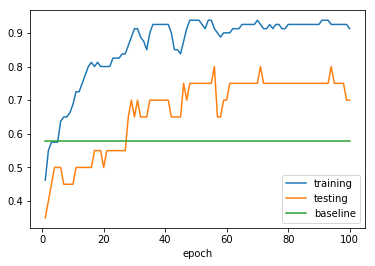

In [26]:
ax = accuracy.plot.line(x='epoch',y='training')
ax = accuracy.plot.line(x='epoch',y='testing',ax=ax)
accuracy.plot.line(x='epoch',y='baseline',ax=ax)

The larger the regulation value, the lower the training and testing accuracy